# Intro till pandas
- Series object
- DataFrame object

In [7]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [16]:
# Extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

# Extract keys
print(f"series.keys(): {series.keys()}")
print(f"series.keys()[-2]: {series.keys()[-2]}")

series[0]: 25
series[-1]: 23
series.keys(): Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys()[-2]: APP


## DataFrame

In [19]:
df = pd.DataFrame(series)
df

,0
AI,25
NET,30
APP,27
Java,23


In [21]:
df = pd.DataFrame(series, columns=("Numer students",))
df

,Numer students
AI,25
NET,30
APP,27
Java,23


In [26]:
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "JAVA"))
df = pd.DataFrame({"Students":series, "Language":languages})
df

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [30]:
df.index    # get all indexs

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data Selection

In [34]:
df.Students     # gets a Series with attribute-approach

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [36]:
df["Students"]      # gets a Series with dictionary-keys approach

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [43]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [56]:
# wants to get all rows > 24 students
df["Students"] > 24

# masking
large_groups = df[df["Students"] > 24]     # all rows that are true in df["Students"] > 24
large_groups

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


In [57]:
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Antal Studenter i olika program')

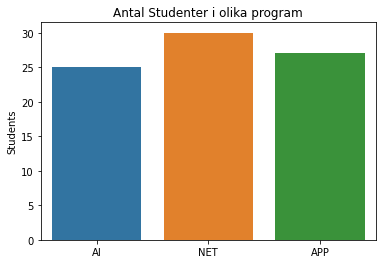

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = large_groups, x = large_groups.index, y = "Students")
plt.title("Antal Studenter i olika program")       # can also use seaboarns methods for this

In [68]:
# Read Excel

calories = pd.read_excel("data/calories.xlsx")